## 作業
畫出 16 個 bin 的顏色直方圖,並嘗試回答每個 channel 在 [16, 32] 這個 bin 中有多少個 pixel？

In [1]:
import os
import keras
os.environ["CUDA_VISIBLE_DEVICES"] = "" # 使用 CPU

import cv2 # 載入 cv2 套件
import matplotlib.pyplot as plt

plt.style.use('ggplot')

train, test = keras.datasets.cifar10.load_data()

Using TensorFlow backend.


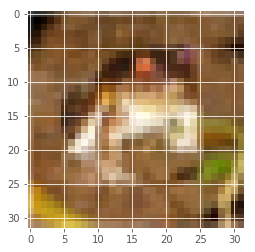

In [2]:
image = train[0][0] # 讀取圖片

plt.imshow(image)
plt.show()

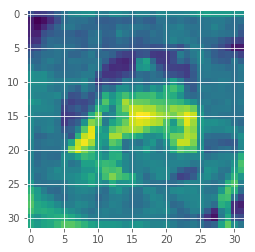

In [3]:
# 把彩色的圖片轉為灰度圖
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)
plt.show()

通過調用 __cv2.calcHist(images, channels, mask, histSize, ranges)__ 函數來得到統計後的直方圖值

* imaages (list of array)：要分析的圖片
* channels：產生的直方圖類型。例：[0]→灰度圖，[0, 1, 2]→RGB三色。
* mask：optional，若有提供則僅計算 mask 部份的直方圖。
* histSize：要切分的像素強度值範圍，預設為256。每個channel皆可指定一個範圍。例如，[32,32,32] 表示RGB三個channels皆切分為32區段。
* ranges：像素的範圍，預設為[0,256]，表示<256。

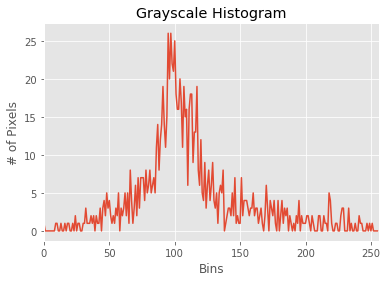

In [4]:
# 調用 cv2.calcHist 函數，回傳值就是 histogram
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

In [5]:
print("hist shape:", hist.shape, "\n直方圖中前兩個值:", hist[:2]) # 1 表示該灰度圖中，只有 1 個 pixel 的值是 0，0 個 pixel 的值是 1

hist shape: (256, 1) 
直方圖中前兩個值: [[1.]
 [0.]]


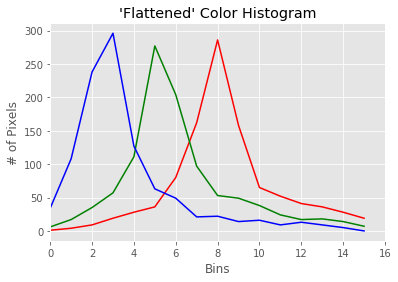

In [6]:
chans = cv2.split(image) # 把圖像的 3 個 channel 切分出來
colors = ("r", "g", "b")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

pixels = {}

# 對於所有 channel
for (chan, color) in zip(chans, colors):
    # 計算該 channel 的直方圖
    hist = cv2.calcHist([chan], [0], None, [16], [0, 256])
    pixels[color] = hist
    # 畫出該 channel 的直方圖
    plt.plot(hist, color = color)
    plt.xlim([0, 16])
plt.show()

In [7]:
import pandas as pd
pixels_data = pd.DataFrame(index=range(0, 256, 16), columns=colors)

for color in colors:
    pixels_data[color] = pixels[color]

pixels_data = pixels_data.T
pixels_data

,0,16,32,48,64,80,96,112,128,144,160,176,192,208,224,240
r,1.0,4.0,9.0,19.0,28.0,36.0,80.0,162.0,286.0,158.0,65.0,52.0,41.0,36.0,28.0,19.0
g,6.0,17.0,35.0,57.0,111.0,277.0,204.0,97.0,53.0,49.0,38.0,24.0,17.0,18.0,14.0,7.0
b,34.0,108.0,238.0,296.0,127.0,63.0,49.0,21.0,22.0,14.0,16.0,9.0,13.0,9.0,5.0,0.0


In [8]:
index_list = range(0, 256, 16)
for index in index_list:
    if index == 16 or index == 32:
        print("在 %d bin:" %index)
        print ("r 有  %d 個 Pixel" %(pixels_data.loc['r', index]))
        print ("g 有  %d 個 Pixel" %(pixels_data.loc['g', index]))
        print ("b 有  %d 個 Pixel\n" %(pixels_data.loc['b', index]))

在 16 bin:
r 有  4 個 Pixel
g 有  17 個 Pixel
b 有  108 個 Pixel

在 32 bin:
r 有  9 個 Pixel
g 有  35 個 Pixel
b 有  238 個 Pixel

